<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_31_power_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


No null values

In [6]:
df.shape

(1030, 9)

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


No categorical column.

Range of prediction column is roughly 2 to 82.

From direct observation, it can be said that there are a lot of outliers, especially in the `Age` column.

The distribution does not appear to be normal based on a simple observation, so it is necessary to confirm its normality using `qqplot` and `distplot` visualization methods.

Our task is to use the `box-cox transformer`, which has the constraint that it cannot be used with 0 and negative values. Fortunately, we don't have negative values, but we do have zero values that need to be addressed.

In [8]:
x = df.iloc[:,:-1]
y = df['Strength']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [12]:
x_train.shape

(824, 8)

In [13]:
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

acc = r2_score(y_test, y_pred)

In [15]:
acc*100

62.7553179231485

In [16]:
lr = LinearRegression()

np.mean(cross_val_score(lr, x , y, scoring = 'r2'))

0.46099404916628606

In [17]:
import warnings
warnings.filterwarnings('ignore')

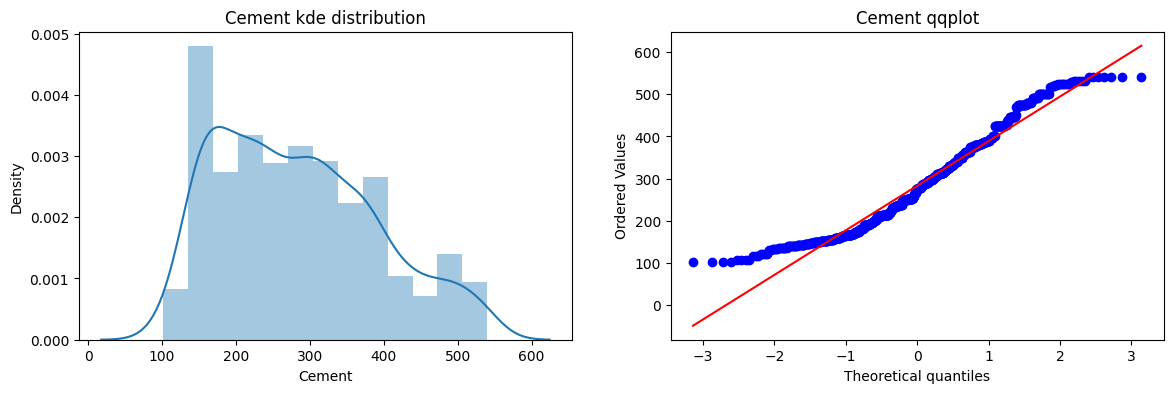

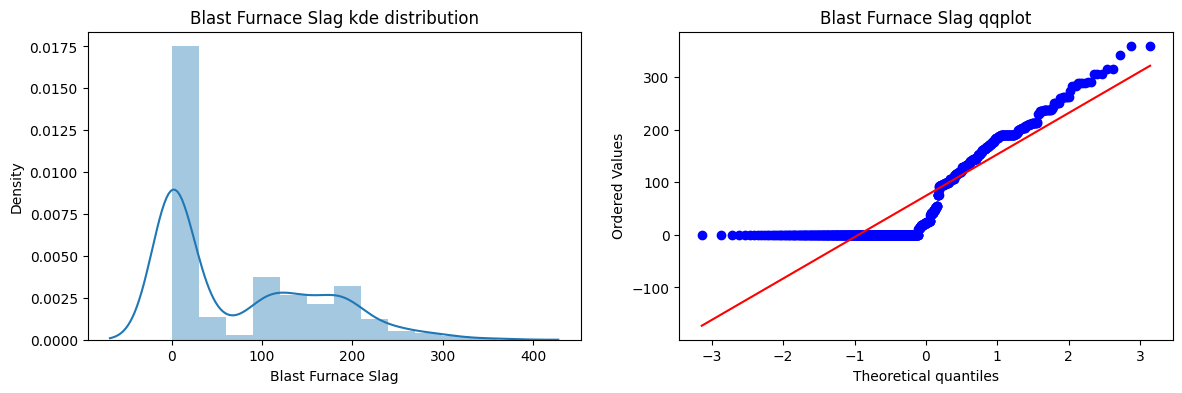

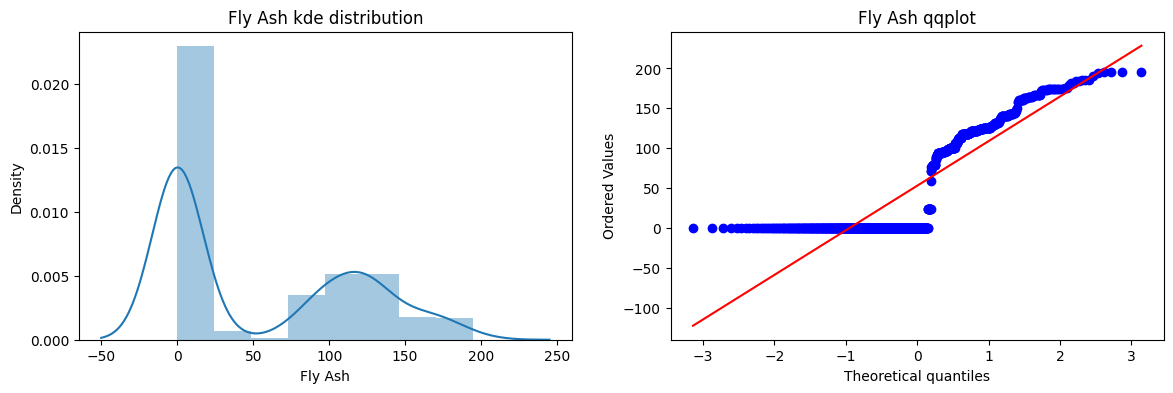

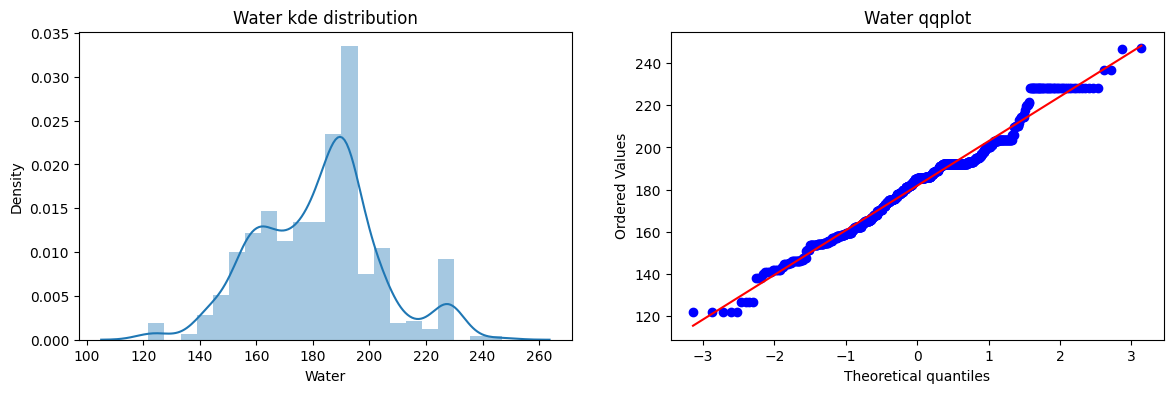

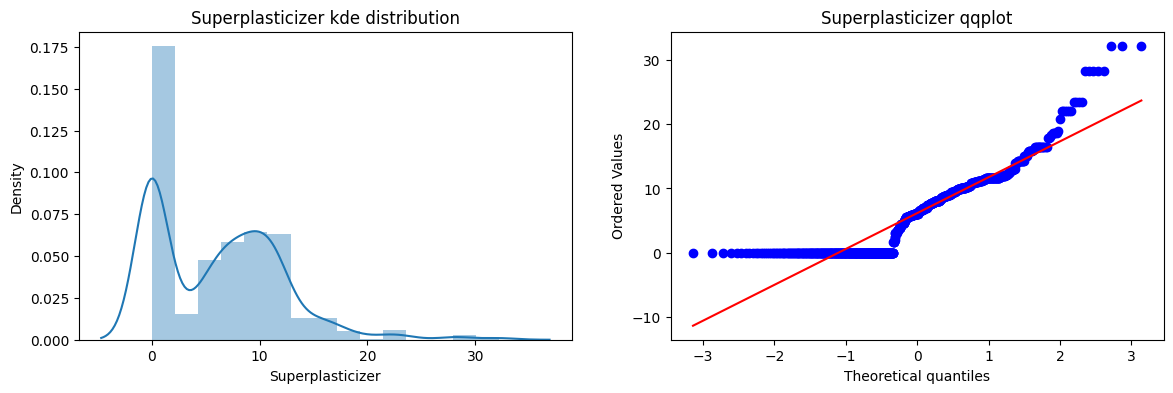

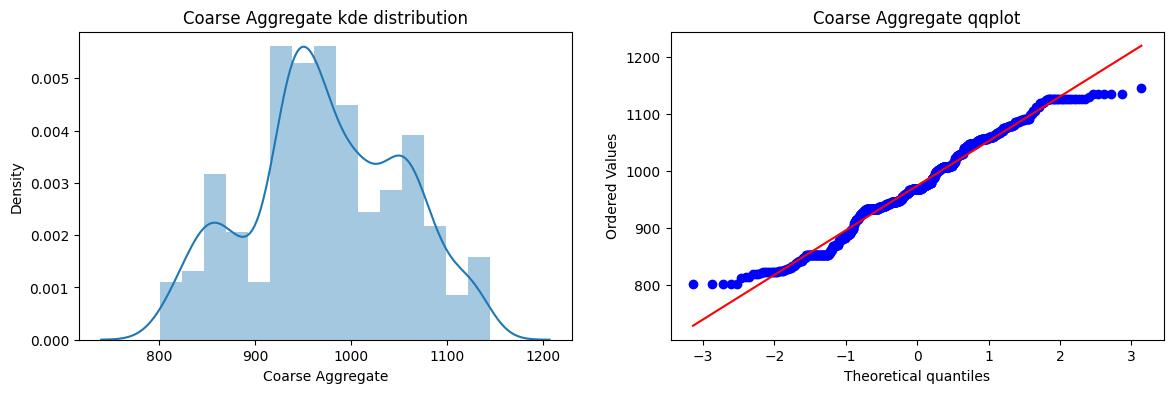

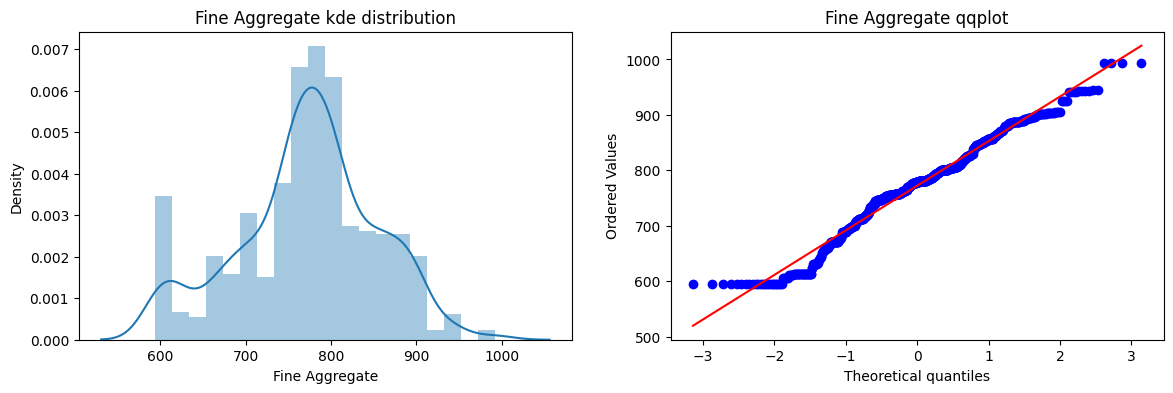

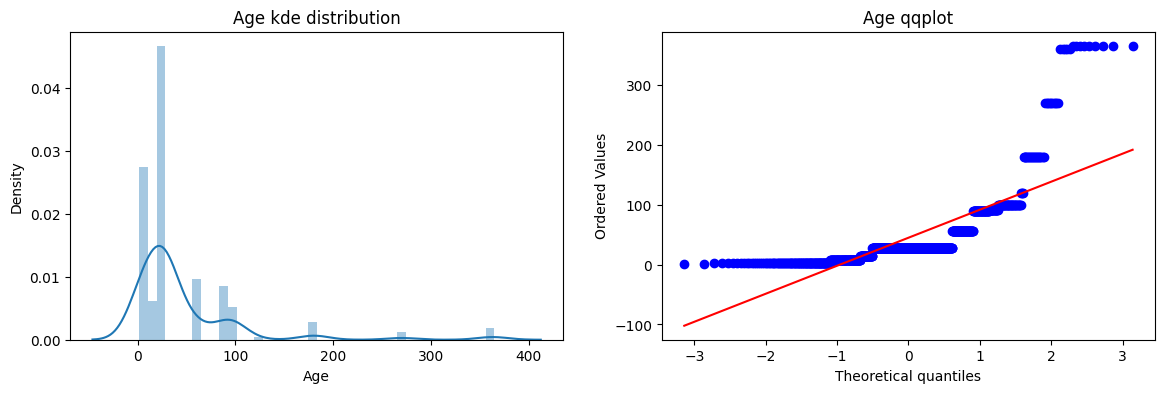

In [20]:
for col in x_train.columns:
  plt.figure(figsize = (14,4))

  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(col +' kde distribution')

  plt.subplot(122)
  stats.probplot(x_train[col], plot = plt)
  plt.title(col+' qqplot')

Here, we could have used scaling to normalize values and we can do but when we use power transformer there is not need not standardization because internally, their is default uni-variance normalization.

Let's apply box-cox transform. 

Normally Yeo-johnson works well with data in comparision to box-cox. Additionally it consider negative and zero values also.

In [25]:
pt = PowerTransformer(method = 'box-cox')

x_train_trans = pt.fit_transform(x_train+0.000000000001)
x_test_trans = pt.transform(x_test+0.0000000000000001)

pd.DataFrame({'cols':x_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.015329
2,Fly Ash,-0.022269
3,Water,0.772681
4,Superplasticizer,0.054469
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


Here is the selected values of `lambda` of each column through which are raising each column and calculating values.

In [30]:
lr = LinearRegression()

lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

r2_score(y_pred, y_test)*100

74.97948587736538

Decent improvement

In [33]:
x_transformed = pt.fit_transform(x+0.000000001)

In [35]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring = 'r2'))

0.6651894387980742

Performing better than earlier

Side wise comparision of before and after transformation

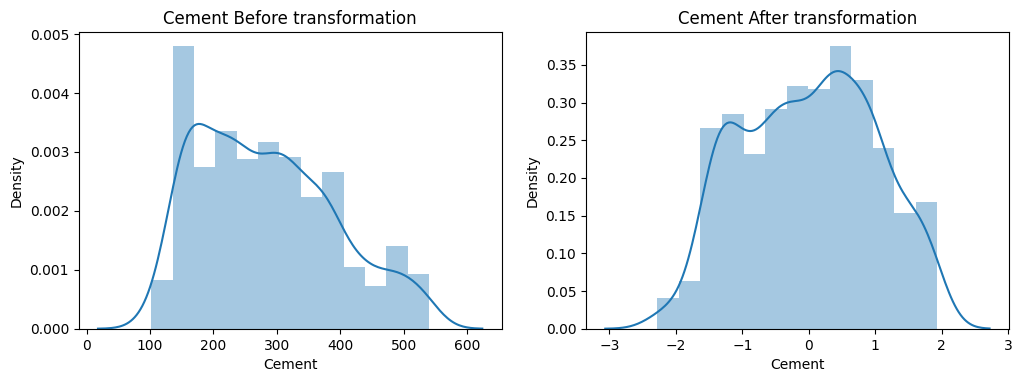

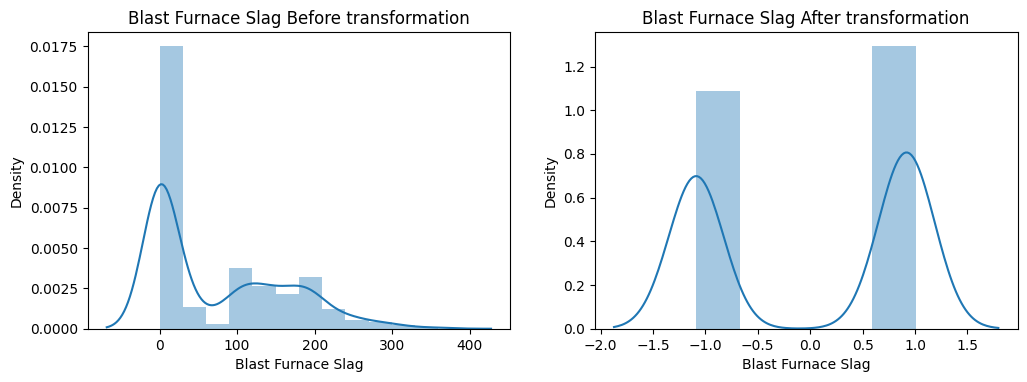

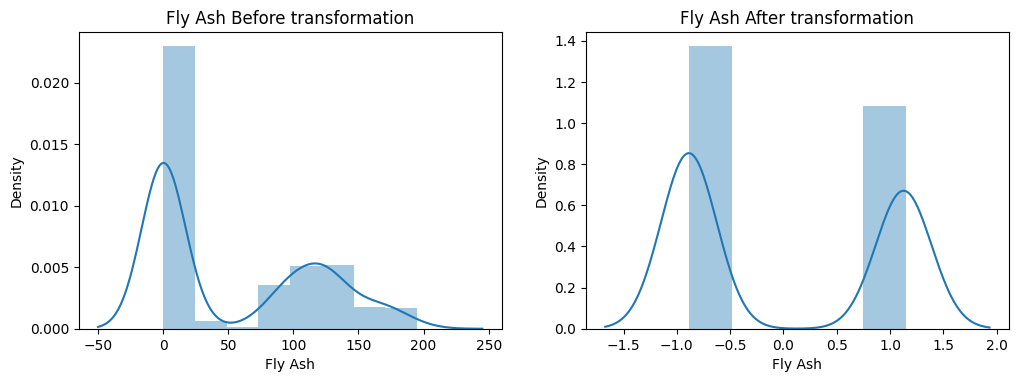

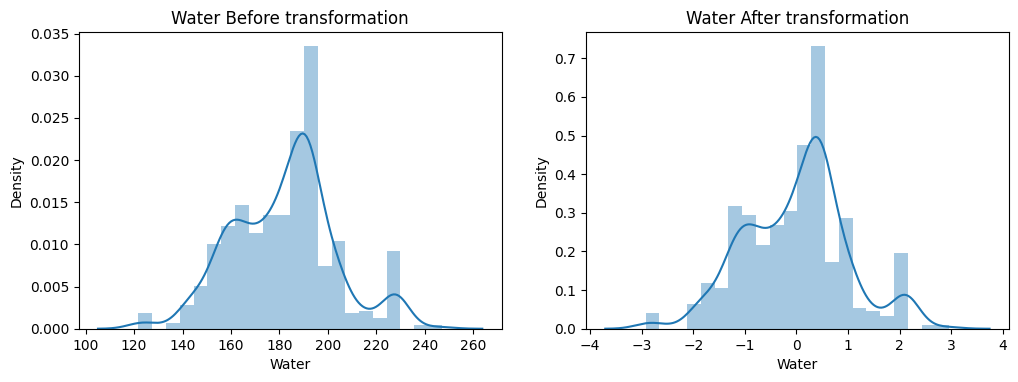

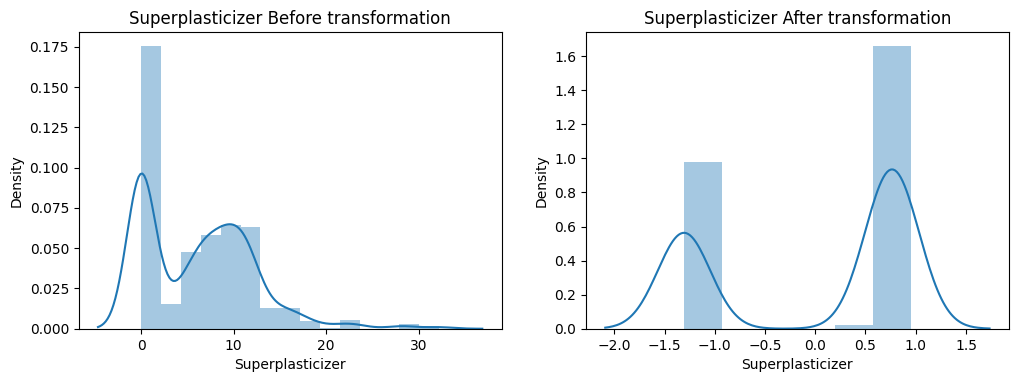

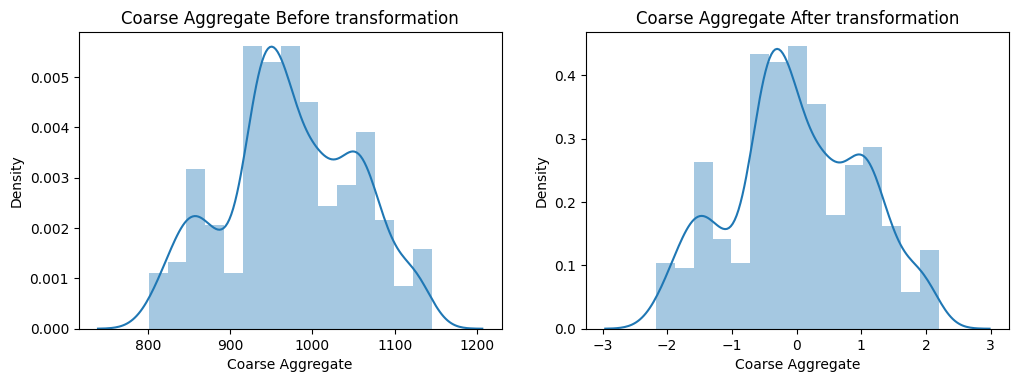

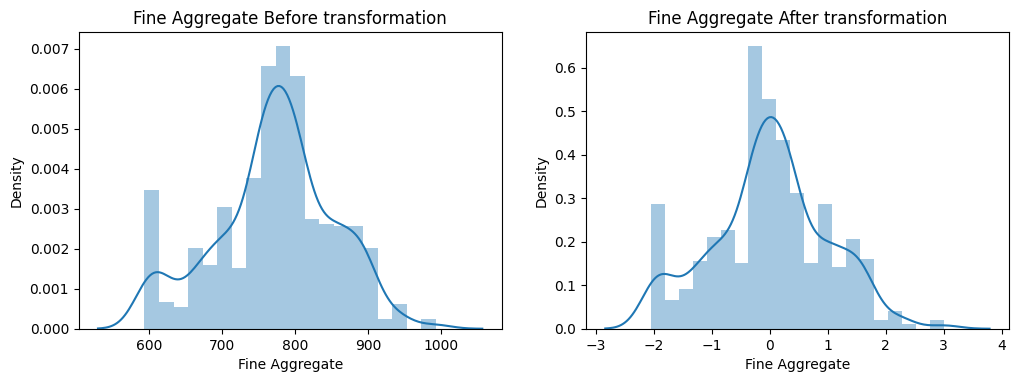

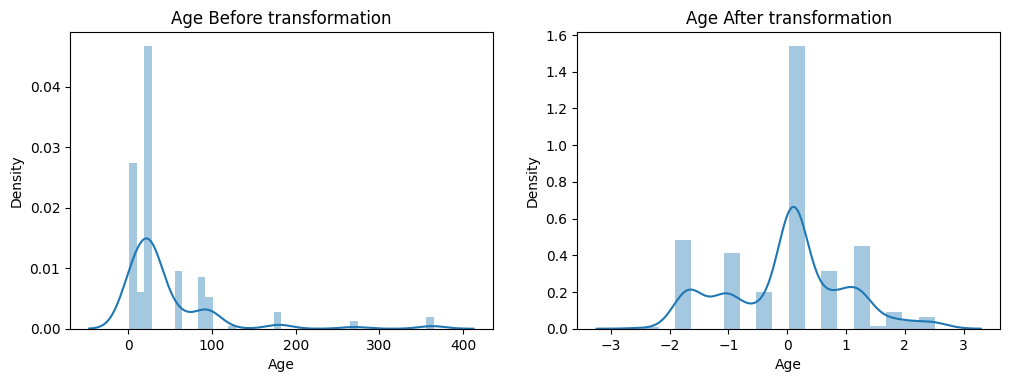

In [37]:
x_train_transformed = pd.DataFrame(x_train_trans, columns = x_train.columns)

for col in x_train:
  plt.figure(figsize= (12,3.85))
  plt.subplot(121)
  sns.distplot(x_train[col])
  plt.title(col +' Before transformation')

  plt.subplot(122)
  sns.distplot(x_train_transformed[col])
  plt.title(col +' After transformation')

Method Worked so well

# **YEO-JOHNSON**

In [38]:
yjt = PowerTransformer()

x_train_trans2 = yjt.fit_transform(x_train)
x_test_trans2 = yjt.transform(x_test)

lr = LinearRegression()

lr.fit(x_train_trans2, y_train)
y_pred = lr.predict(x_test_trans2)

r2_score(y_test, y_pred)

0.8161906512004999

We can see better result than box-cox

In [39]:
x_trans2 = yjt.fit_transform(x)
lr = LinearRegression()
np.mean(cross_val_score(lr, x_trans2, y, scoring = 'r2'))

0.6834625141500866

In [40]:
pd.DataFrame({'cols': x_train.columns, 'y-j_lambas': yjt.lambdas_})

,cols,y-j_lambas
0,Cement,0.169544
1,Blast Furnace Slag,0.016633
2,Fly Ash,-0.136480
3,Water,0.808438
4,Superplasticizer,0.264160
5,Coarse Aggregate,1.129395
6,Fine Aggregate,1.830763
7,Age,0.001771


In [44]:
type(x_train_trans2)

numpy.ndarray

In [41]:
col = 'Age'

In [45]:
x_train_trans2 = pd.DataFrame(x_train_trans2, columns = x_train.columns)

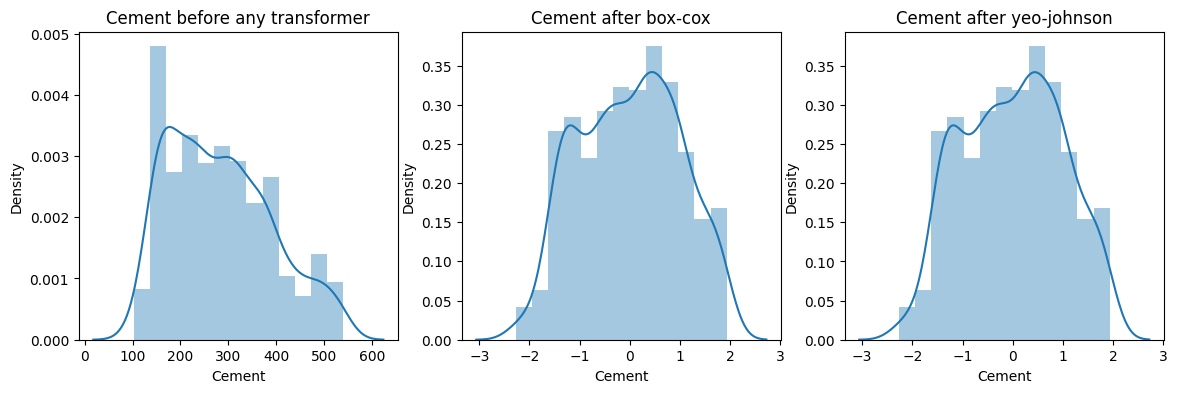

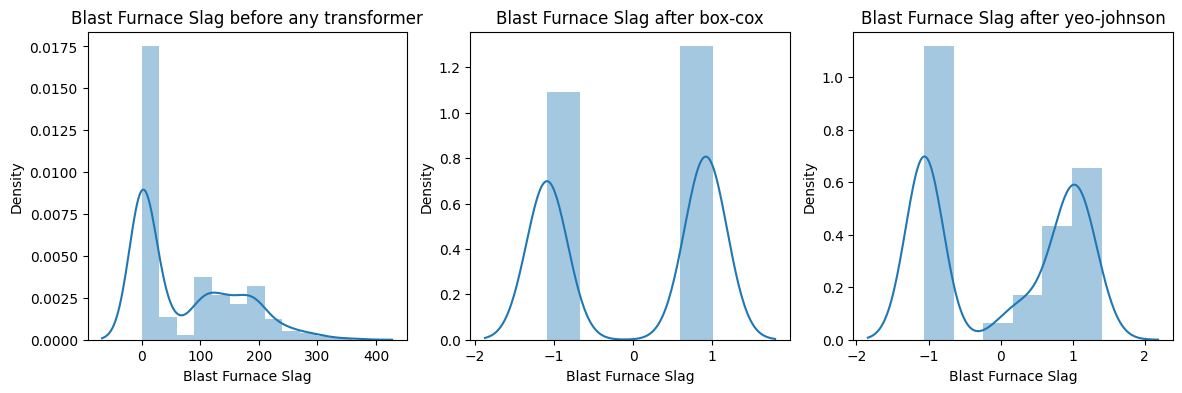

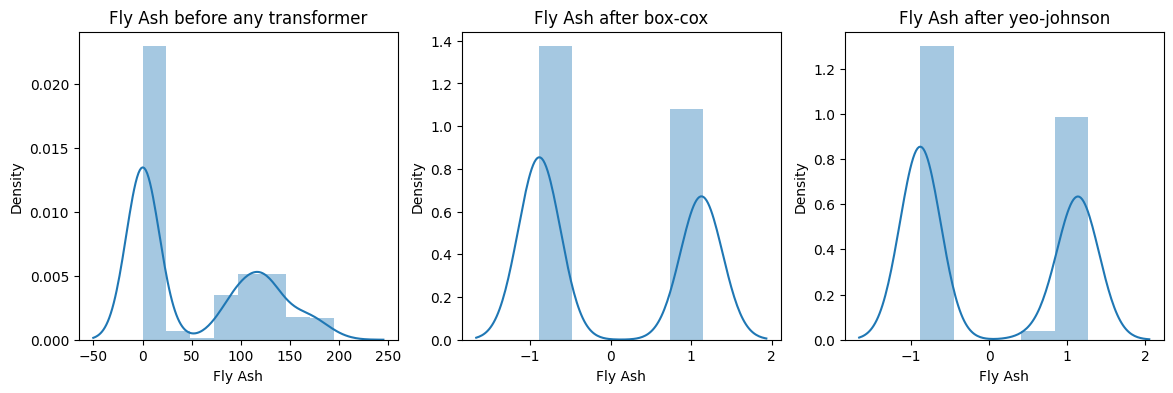

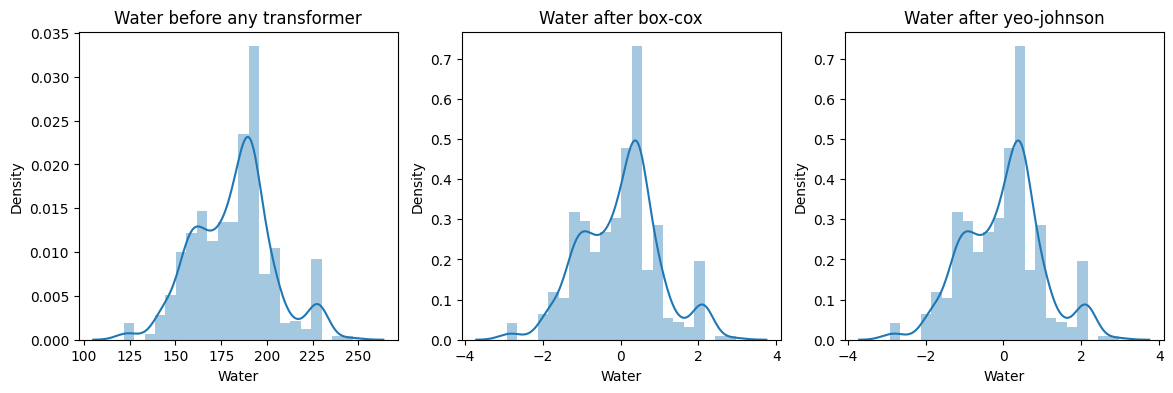

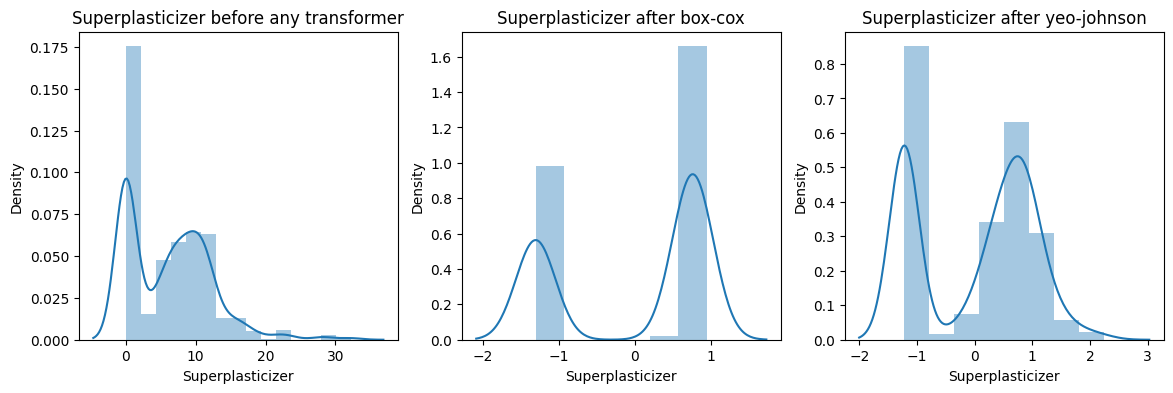

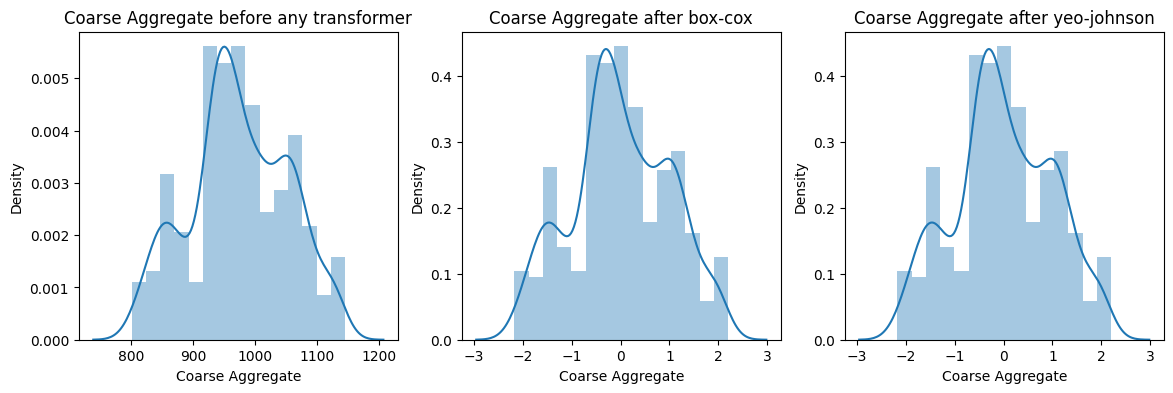

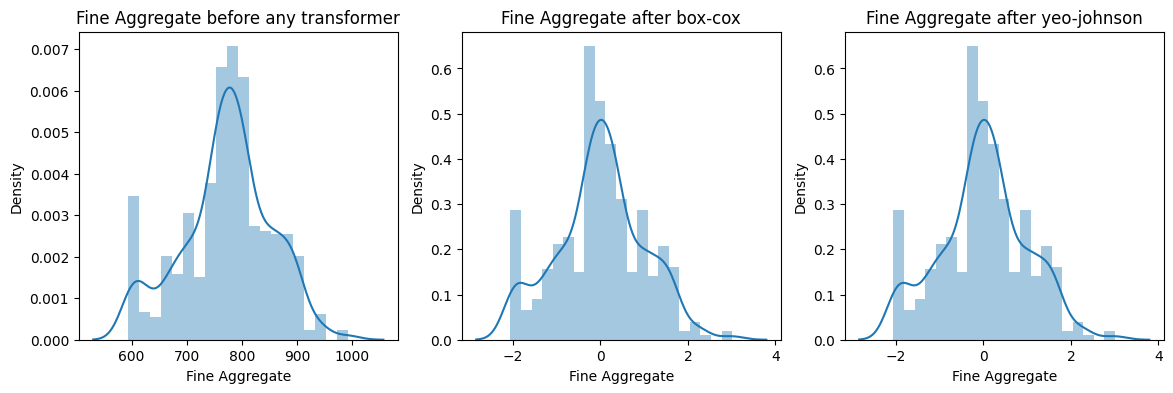

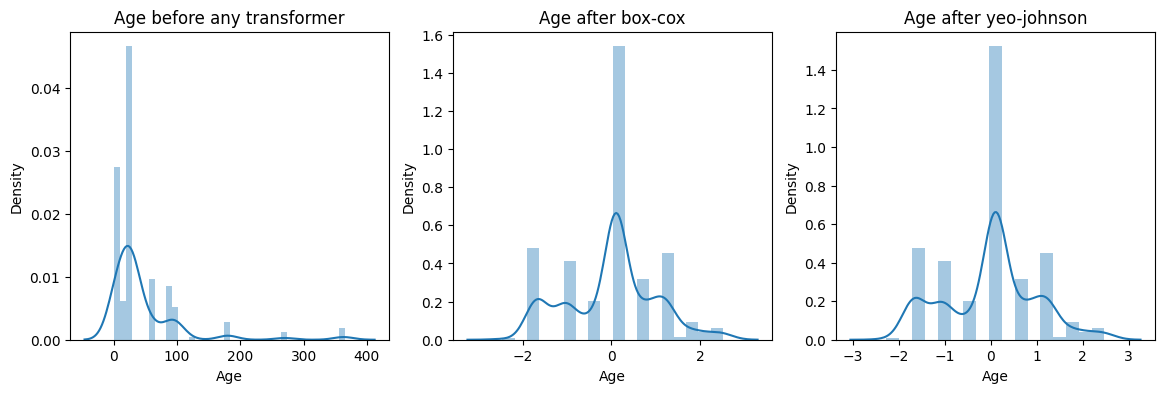

In [54]:
for col in x_train.columns:
  fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, figsize = (14,4))

  sns.distplot(x_train[col], ax = ax1)
  ax1.set_title(col+' before any transformer')

  sns.distplot(x_train_transformed[col], ax = ax2)
  ax2.set_title(col+' after box-cox')

  sns.distplot(x_train_trans2[col], ax = ax3)
  ax3.set_title(col+ ' after yeo-johnson')

We can see the difference between all the three and my observation is that `yeo-johnson` had tried more to be ideal normal than `box-cox`